In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fd-ds/data.csv


# 1. Introduction

- The dataset under consideration represents a transnational record of transactions spanning from December 1, 2010, to December 9, 2011, for a UK-based online retail company specializing in unique all-occasion gifts.
- As a registered non-store online retailer, the company caters to a diverse customer base, with a significant portion comprising wholesalers. 
- With an extensive range of products and a broad customer demographic, understanding and effectively segmenting customers is crucial for optimizing marketing strategies, improving customer satisfaction, and ultimately driving profitability.

# 2. Problem Statement

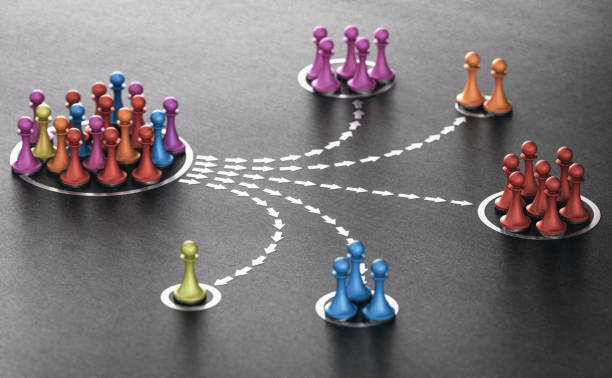

The objective of this clustering project is to **segment** the company's customer base based on their purchasing behavior, with the aim of gaining insights into distinct customer segments and tailoring marketing strategies accordingly. 
- By identifying homogeneous groups of customers with similar purchasing patterns, we seek to address the following key questions:

    - What are the different customer segments within the dataset, and how do they differ in terms of purchasing behavior, transaction frequency, and monetary value?
    - How can we effectively categorize customers into meaningful clusters to facilitate targeted marketing efforts and personalized customer experiences?
    - What actionable insights can be derived from the identified customer segments to optimize marketing strategies, improve customer retention, and drive revenue growth?


We aim to uncover hidden patterns within the data and provide actionable insights that can inform strategic decision-making and enhance the company's competitive advantage in the online retail landscape.

# 3. Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
import warnings
import plotly.graph_objs as go  
import plotly.express as px
warnings.simplefilter('ignore')

# 4. Data Acquisition

 - This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

#### Data Author: Daqing Chen
- chend@lsbu.ac.uk
- School of Engineering, London South Bank University

In [3]:
data =  pd.read_csv('/kaggle/input/fd-ds/data.csv', encoding='unicode_escape')
print('Shape of the data:', data.shape)
data.head()

Shape of the data: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Observations:
    
The dataset comprises **5,41,909** rows and **8** columns. Here is a concise overview of the column information.
    
- **InvoiceNo**: This column holds unique invoice numbers (object data type), each representing transactions that may involve multiple purchased items.
   
    
- **StockCode**: An object data type column representing the product code for each item. 

    
- **Description**: This object column, describing products, has 540,455 non-null entries out of 541,909, with some missing values.

- **Quantity**: This integer column represents the quantity of products bought in each transaction.
    
- **InvoiceDate**: This object column indicates the date of each transaction.
    
- **UnitPrice**: This float column denotes the price per unit for each product.
    
- **CustomerID**: This float column represents the unique ID for each customer.
    
- **Country**: This object column denotes the country of purchase for each product.
    
From initial observations, we can see there are missing values in the fields of **Description** and **CustomerID**.

# 5. Data Pre-profiling

- Summary statistics for all the Continous variables.

In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- Summary statistics for all the Categorical variables.

In [6]:
data.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


- Check for any Missing values.

In [7]:
100 *(data.isnull().sum()/data.shape[0])

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

- We have **25%** missing values in the field **CustomerID** and **0.26%** missing values in the field of **Description**

- Check for any Duplicate records.

In [8]:
duplicate_rec = data[data.duplicated(keep=False)]

d_r_sorted = duplicate_rec.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])
print(d_r_sorted.shape)
d_r_sorted.head(15)

(10147, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [9]:
100 * (d_r_sorted.shape[0]/data.shape[0])

1.8724546003111224

- We've identified nearly **2%** duplicate records in the dataset.
- Addressing these duplicates is crucial before proceeding with clustering, as they can introduce substantial noise to the data and hinder the effectiveness of the clustering process.

In [10]:
print(data[data.duplicated()].shape)
data[data.duplicated()]

(5268, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [11]:
100*(data[data.duplicated()].shape[0]/data.shape[0])

0.9721189350979592

- We've identified **5268** unique values repeating in the dataset, contributing to a total of **10147** duplicate entries. 
- To ensure data integrity, we should remove one instance of each duplicated record.

# 6. Data Pre-processing

- Removing rows with missing values in '**CustomerID**' and '**Description**' columns.

In [12]:
data.dropna(subset=['CustomerID', 'Description'], inplace=True)
data = data.reset_index(drop=True)

- Eliminating observed duplicate instances identified during the pre-profiling phase.

In [13]:
data.drop_duplicates(inplace=True)
data = data.reset_index(drop=True)

In [14]:
data.shape

(401604, 8)

# 7. Data Post-profiling

In [15]:
data[data.duplicated()].shape

(0, 8)

In [16]:
100 *(data.isnull().sum()/data.shape[0])

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

- All the duplicated and missing values have been removed.

#### Dealing with cancelled orders.

In [17]:
Cancelled_orders = data[data['InvoiceNo'].str.contains('C')]
print('Shape:', Cancelled_orders.shape)
Cancelled_orders.head()

Shape: (8872, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [18]:
100*(Cancelled_orders.shape[0]/data.shape[0])

2.209141343213713

- Cancelled orders are characterized by quantities denoted with a negative sign, constituting approximately **2.21%** of the total orders. 
- To enhance the analysis, we propose removing these cancelled observations as they have minimal contribution.

In [19]:
Cancelled_orders.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


#####  Observations:
- All quantities in cancelled transactions are negative, confirming their nature. 
- The UnitPrice column exhibits a significant spread, reflecting a diverse range of products involved in cancelled transactions, spanning from low to high values.

# 8. Feature Engineering

- RFM is a method used for analyzing customer value and segmenting customers which is commonly used in the retail and professional services industries.
- Its acronym stands for **Recency**, **Frequency** and **Monetary Value** of a customer.

- **Recency**: Recency assesses how recently a customer made a purchase. Customers with recent purchases, usually within the last few weeks, are more likely to have the product and brand at the forefront of their minds, increasing the likelihood of a repeat purchase.

- **Frequency**: Frequency indicates how often a customer makes purchases, offering insights into repeat buying patterns. Identifying customers with frequent repeat purchases is crucial, as it helps in recognizing individuals likely to continue shopping with your brand beyond their initial purchase.

- **Monetary value**: Monetary value signifies the total amount a customer spends within a specific period. This metric is crucial for understanding consumer behavior. For instance, customers with the highest monetary value may not make frequent purchases but tend to invest in more expensive products when they do.

- Data after removing the Cancelled orders.

In [20]:
new_df = data[~(data['InvoiceNo'].str.contains('C'))]
print('Shape of the final data:', new_df.shape)
new_df.head()

Shape of the final data: (392732, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


- **Recency**: Calculating the number of days since the purchase.

In [21]:
df = new_df
df.shape

(392732, 8)

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
df['DayofPurchase'] = df['InvoiceDate'].dt.date
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayofPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [24]:
Customer_df = df.groupby('CustomerID')['DayofPurchase'].max().reset_index()
Customer_df.head(2)

,CustomerID,DayofPurchase
0,12346.0,2011-01-18
1,12347.0,2011-12-07


In [25]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 401603
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      392732 non-null  object        
 1   StockCode      392732 non-null  object        
 2   Description    392732 non-null  object        
 3   Quantity       392732 non-null  int64         
 4   InvoiceDate    392732 non-null  datetime64[ns]
 5   UnitPrice      392732 non-null  float64       
 6   CustomerID     392732 non-null  float64       
 7   Country        392732 non-null  object        
 8   DayofPurchase  392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.0+ MB


- We observe that the 'DayofPurchase' column is currently of object type; it needs to be converted to a Datetime data type.

In [26]:
mrdate = df['DayofPurchase'].max() #mrdate = Identifying the most recent purchase date
Customer_df['DayofPurchase'] = pd.to_datetime(Customer_df['DayofPurchase'])
mrdate = pd.to_datetime(mrdate)

Customer_df['Days since last Purchase'] = (mrdate - Customer_df['DayofPurchase']).dt.days
Customer_df.head(2)

,CustomerID,DayofPurchase,Days since last Purchase
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2


In [27]:
Customer_df.drop(columns=['DayofPurchase'], inplace=True) #We no longer need the column 'DayofPurchase'
Customer_df.head()

,CustomerID,Days since last Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


- **Frequency**: Calculating the customer's order count.

In [28]:
Total_Orders = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
Total_Orders.rename(columns={'InvoiceNo':'No.of.Orders'}, inplace = True)

Total_Orders.head()

,CustomerID,No.of.Orders
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [29]:
Customer_df = pd.merge(Customer_df, Total_Orders, on='CustomerID')
Customer_df.head()

,CustomerID,Days since last Purchase,No.of.Orders
0,12346.0,325,1
1,12347.0,2,7
2,12348.0,75,4
3,12349.0,18,1
4,12350.0,310,1


- **Monetary Value**: Calculating the amount spent per transaction.

In [30]:
df['Amount'] = df['Quantity']*df['UnitPrice']
Amount = df.groupby('CustomerID')['Amount'].sum().reset_index()
Amount.head(2)

,CustomerID,Amount
0,12346.0,77183.6
1,12347.0,4310.0


In [31]:
Customer_df = pd.merge(Customer_df, Amount, on='CustomerID')
Customer_df.head(2)

,CustomerID,Days since last Purchase,No.of.Orders,Amount
0,12346.0,325,1,77183.6
1,12347.0,2,7,4310.0


- Calculating for favorite day of the week for a customer to purchase

In [32]:
df['Day.of.the.Week'] = df['InvoiceDate'].dt.dayofweek
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayofPurchase,Amount,Day.of.the.Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2


In [33]:
PreferredDay = df.groupby(['CustomerID', 'Day.of.the.Week']).size().reset_index(name='Count')
PreferredDay.head()

,CustomerID,Day.of.the.Week,Count
0,12346.0,1,1
1,12347.0,0,47
2,12347.0,1,53
3,12347.0,2,40
4,12347.0,3,42


In [34]:
PreferredDay = PreferredDay.loc[PreferredDay.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day.of.the.Week']]
PreferredDay.head()

,CustomerID,Day.of.the.Week
0,12346.0,1
2,12347.0,1
6,12348.0,3
8,12349.0,0
9,12350.0,2


In [35]:
Customer_df =pd.merge(Customer_df, PreferredDay, on='CustomerID')
Customer_df.head()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week
0,12346.0,325,1,77183.60,1
1,12347.0,2,7,4310.00,1
2,12348.0,75,4,1797.24,3
3,12349.0,18,1,1757.55,0
4,12350.0,310,1,334.40,2


- **Reference**: In Pandas, The day of the week works as Monday=0, Sunday=6.

In [36]:
Origin_Country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='No.of.Orders')
Origin_Country.drop(columns = 'No.of.Orders', inplace=True)
Origin_Country.head()

,CustomerID,Country
0,12346.0,United Kingdom
1,12347.0,Iceland
2,12348.0,Finland
3,12349.0,Italy
4,12350.0,Norway


In [37]:
Customer_df = pd.merge(Customer_df, Origin_Country, on='CustomerID' )
Customer_df.head()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country
0,12346.0,325,1,77183.60,1,United Kingdom
1,12347.0,2,7,4310.00,1,Iceland
2,12348.0,75,4,1797.24,3,Finland
3,12349.0,18,1,1757.55,0,Italy
4,12350.0,310,1,334.40,2,Norway


In [38]:
Customer_df.shape

(4347, 6)

In [39]:
Customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347 entries, 0 to 4346
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4347 non-null   float64
 1   Days since last Purchase  4347 non-null   int64  
 2   No.of.Orders              4347 non-null   int64  
 3   Amount                    4347 non-null   float64
 4   Day.of.the.Week           4347 non-null   int32  
 5   Country                   4347 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 186.9+ KB


- This represents the final customer data that will be used for segmentation.

# 9. Exploratory Data Analysis

In [40]:
Customer_df.describe()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week
count,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000
mean,15294.640212,91.962963,4.275592,2050.029081,2.544513
std,1724.722441,99.940570,7.700710,8976.350009,1.843768
min,12346.000000,0.000000,1.000000,0.000000,0.000000
25%,13806.500000,17.000000,1.000000,306.635000,1.000000
50%,15292.000000,50.000000,2.000000,671.960000,2.000000
75%,16776.500000,141.000000,5.000000,1661.860000,4.000000
max,18287.000000,373.000000,210.000000,280206.020000,6.000000


In [41]:
Customer_df.head()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country
0,12346.0,325,1,77183.60,1,United Kingdom
1,12347.0,2,7,4310.00,1,Iceland
2,12348.0,75,4,1797.24,3,Finland
3,12349.0,18,1,1757.55,0,Italy
4,12350.0,310,1,334.40,2,Norway


In [42]:
Customer_df['Country'].nunique()

37

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(Customer_df['Country'])

LabelEncoder()

In [44]:
Customer_df['Country_enc'] = pd.DataFrame(le.transform(Customer_df['Country']))

In [45]:
Customer_df.head()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country,Country_enc
0,12346.0,325,1,77183.60,1,United Kingdom,35
1,12347.0,2,7,4310.00,1,Iceland,16
2,12348.0,75,4,1797.24,3,Finland,12
3,12349.0,18,1,1757.55,0,Italy,18
4,12350.0,310,1,334.40,2,Norway,24


In [46]:
Customer_df_new = Customer_df.drop(columns= 'Country')
Customer_df_new.head()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc
0,12346.0,325,1,77183.60,1,35
1,12347.0,2,7,4310.00,1,16
2,12348.0,75,4,1797.24,3,12
3,12349.0,18,1,1757.55,0,18
4,12350.0,310,1,334.40,2,24


In [47]:
Customer_df_new['Day.of.the.Week'].value_counts()

Day.of.the.Week
3    961
2    782
1    718
0    697
4    619
6    570
Name: count, dtype: int64

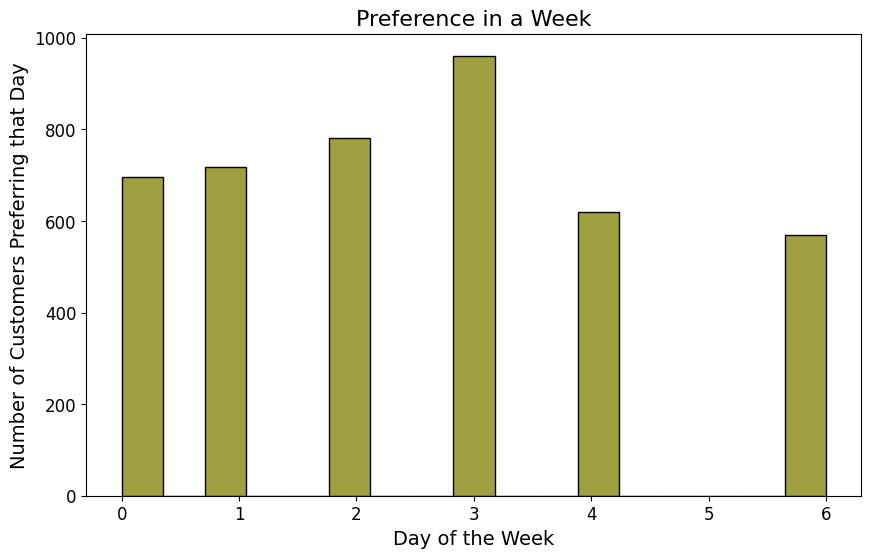

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(Customer_df_new['Day.of.the.Week'], color='olive')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Day of the Week', size=14)
plt.ylabel(ylabel='Number of Customers Preferring that Day', size=14)
plt.title(label='Preference in a Week', size=16)
plt.show()

- Suprisingly, there are no orders on **Saturday**. 
- **Thursday** emerges as the preferred shopping day for the majority of customers compared to other days of the week.

In [49]:
Customer_df_new['Days since last Purchase'].describe()

count    4347.000000
mean       91.962963
std        99.940570
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: Days since last Purchase, dtype: float64

- On average, customers have made a purchase in the past **92 days**.
- Half of the customers made a purchase in the past **50 days**.
- **25%** of customers made a purchase in less than **3** weeks.

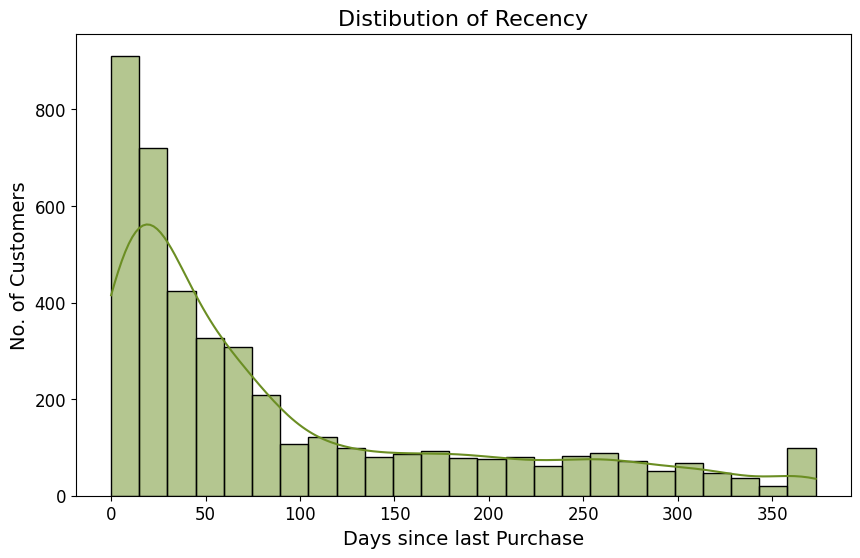

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(Customer_df_new['Days since last Purchase'], kde=True, color='olivedrab')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Days since last Purchase', size=14)
plt.ylabel(ylabel='No. of Customers', size=14)
plt.title(label='Distibution of Recency', size=16)
plt.show()

In [51]:
Customer_df_new['Amount'].describe()

count      4347.000000
mean       2050.029081
std        8976.350009
min           0.000000
25%         306.635000
50%         671.960000
75%        1661.860000
max      280206.020000
Name: Amount, dtype: float64

- On average, each customer has a monetary value of **$2000**.

In [52]:
Customer_df_new.loc[Customer_df_new['Amount'].nlargest(10).index]

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc
1698,14646.0,1,74,280206.02,3,23
4210,18102.0,0,60,259657.30,0,35
3737,17450.0,8,46,194390.79,1,35
3017,16446.0,0,2,168472.50,2,35
1888,14911.0,1,201,143711.17,0,10
57,12415.0,24,21,124914.53,2,0
1342,14156.0,9,55,117210.08,1,10
3780,17511.0,2,31,91062.38,2,35
2711,16029.0,38,63,80850.84,2,35
0,12346.0,325,1,77183.60,1,35


- Top **10** Customers by Transactional Monetary Value.
- And we can see that majority of them are from Label **35** ie., the **United Kingdom.**

In [53]:
Customer_df_new.loc[Customer_df_new['No.of.Orders'].nlargest(10).index]

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc
334,12748.0,0,210,33053.19,2,35
1888,14911.0,1,201,143711.17,0,10
4019,17841.0,1,124,40519.84,2,35
570,13089.0,2,97,58762.08,3,35
1670,14606.0,1,93,12076.15,2,35
2185,15311.0,0,91,60632.75,1,35
489,12971.0,3,86,11189.91,2,35
1698,14646.0,1,74,280206.02,3,23
2711,16029.0,38,63,80850.84,2,35
804,13408.0,1,62,28117.04,2,35


- Top **10** Customers by Transactional Order Volume – Lot Size.
- We can observe that majority of them are ordering on **Wednesday**.
- And also, we can see that majority of them are from again Label **35** ie., the **United Kingdom.**

In [54]:
Avg_orders = Customer_df.groupby('Country')['No.of.Orders'].mean().reset_index()
Avg_orders.head()

,Country,No.of.Orders
0,Australia,6.666667
1,Austria,2.090909
2,Bahrain,1.000000
3,Belgium,4.520000
4,Brazil,1.000000


In [55]:
Avg_amount = Customer_df.groupby('Country')['Amount'].mean().reset_index()
Avg_amount.head()

,Country,Amount
0,Australia,15538.216667
1,Austria,1525.076364
2,Bahrain,274.200000
3,Belgium,1918.848400
4,Brazil,1143.600000


In [56]:
MVC = pd.merge(Avg_orders, Avg_amount, on='Country')
MVC.head()

,Country,No.of.Orders,Amount
0,Australia,6.666667,15538.216667
1,Austria,2.090909,1525.076364
2,Bahrain,1.000000,274.200000
3,Belgium,4.520000,1918.848400
4,Brazil,1.000000,1143.600000


- Engineering a new field, **ATV** - Average Transaction Value.

In [57]:
MVC['ATV'] = MVC['Amount']/MVC['No.of.Orders']
MVC.head()

,Country,No.of.Orders,Amount,ATV
0,Australia,6.666667,15538.216667,2330.732500
1,Austria,2.090909,1525.076364,729.384348
2,Bahrain,1.000000,274.200000,274.200000
3,Belgium,4.520000,1918.848400,424.523982
4,Brazil,1.000000,1143.600000,1143.600000


In [58]:
MVC.loc[MVC['ATV'].nlargest(10).index]

,Country,No.of.Orders,Amount,ATV
29,Singapore,7.000000,21279.290000,3039.898571
23,Netherlands,10.555556,31716.260000,3004.698316
0,Australia,6.666667,15538.216667,2330.732500
19,Japan,2.375000,4677.046250,1969.282632
20,Lebanon,1.000000,1693.880000,1693.880000
17,Israel,1.666667,2405.280000,1443.168000
4,Brazil,1.000000,1143.600000,1143.600000
31,Sweden,4.500000,4795.978750,1065.773056
32,Switzerland,2.619048,2724.897619,1040.415455
10,EIRE,86.666667,88420.820000,1020.240231


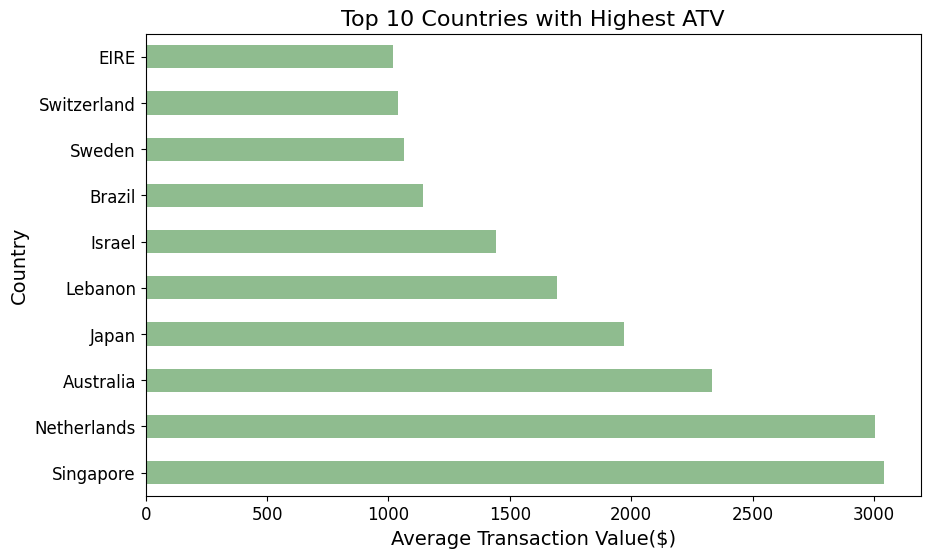

In [59]:
plt.figure(figsize=(10,6))
MVC.groupby('Country')['ATV'].sum().sort_values(ascending=False)[:10].plot.barh(color='darkseagreen')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Average Transaction Value($)', size=14)
plt.ylabel(ylabel='Country', size=14)
plt.title(label='Top 10 Countries with Highest ATV', size=16)
plt.show()

- Top **10** Countries with Highest Average Transactional Value – **High Ticket Sales**.

In [60]:
MVC.loc[MVC['ATV'].sort_values(ascending=False).index]

,Country,No.of.Orders,Amount,ATV
29,Singapore,7.000000,21279.290000,3039.898571
23,Netherlands,10.555556,31716.260000,3004.698316
0,Australia,6.666667,15538.216667,2330.732500
19,Japan,2.375000,4677.046250,1969.282632
20,Lebanon,1.000000,1693.880000,1693.880000
17,Israel,1.666667,2405.280000,1443.168000
4,Brazil,1.000000,1143.600000,1143.600000
31,Sweden,4.500000,4795.978750,1065.773056
32,Switzerland,2.619048,2724.897619,1040.415455
10,EIRE,86.666667,88420.820000,1020.240231


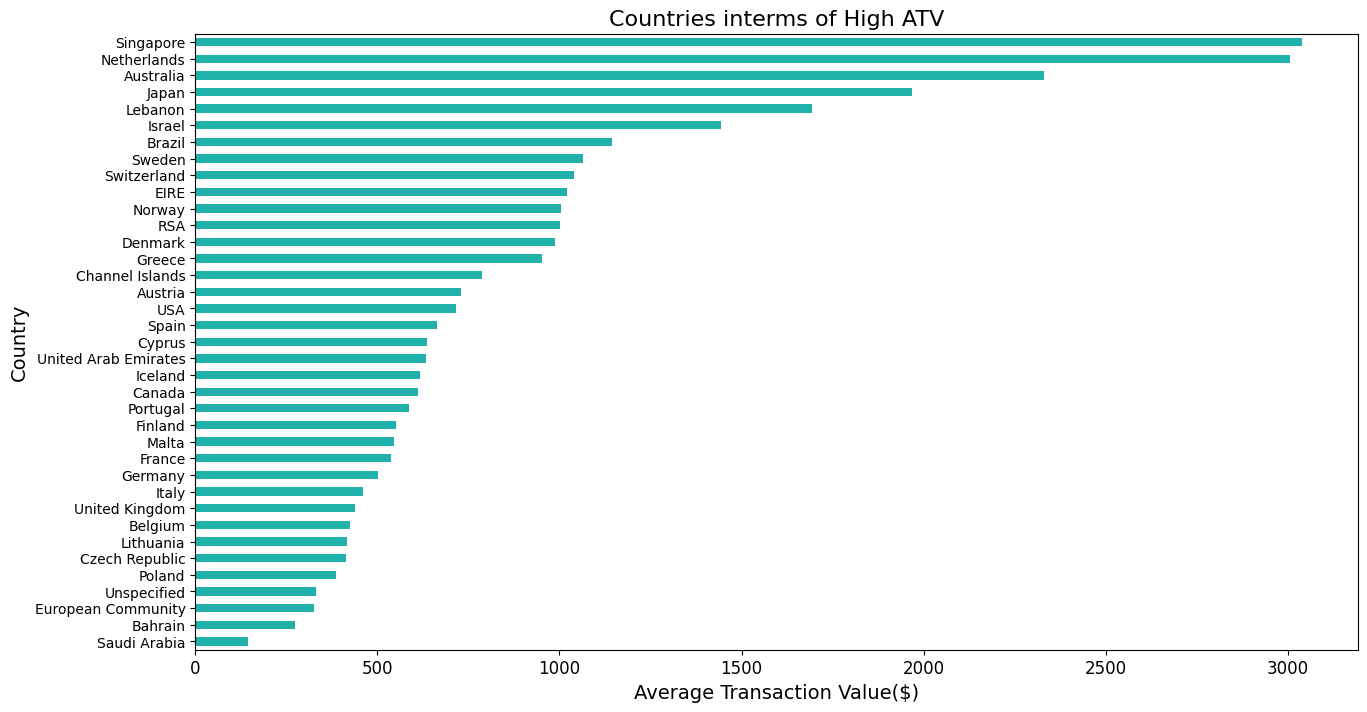

In [61]:
plt.figure(figsize=(15,8))
MVC.groupby('Country')['ATV'].sum().sort_values(ascending=True).plot.barh(color='lightseagreen')

plt.xticks(size=12)
plt.yticks(size=10)
plt.xlabel(xlabel='Average Transaction Value($)', size=14)
plt.ylabel(ylabel='Country', rotation=90, size=14)
plt.title(label='Countries interms of High ATV', size=16)
plt.show()

- Despite the **United Kingdom** having the **highest number of customers**, **maximum order count**, and **highest overall spending**, the average transactional value per customer (**ATV**) in the UK is notably lower compared to other countries. 
- Leading in this aspect are **Singapore** and **Netherlands**, followed by **Australia** and **Japan**.

In [62]:
Customer_df_new.head()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc
0,12346.0,325,1,77183.60,1,35
1,12347.0,2,7,4310.00,1,16
2,12348.0,75,4,1797.24,3,12
3,12349.0,18,1,1757.55,0,18
4,12350.0,310,1,334.40,2,24


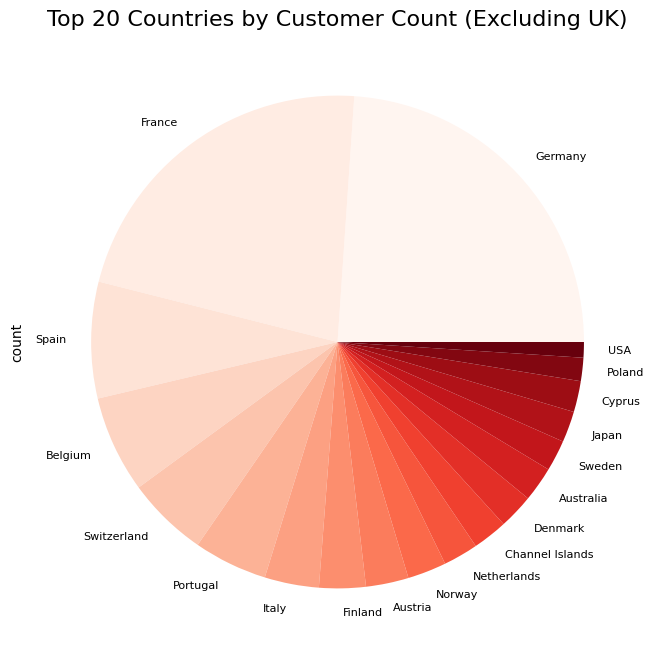

In [63]:
plt.figure(figsize=(15,8))
Customer_df['Country'].value_counts()[1:20].plot(kind='pie', fontsize=8, startangle=0, cmap='Reds')

plt.title(label='Top 20 Countries by Customer Count (Excluding UK)', size=16)
plt.show()

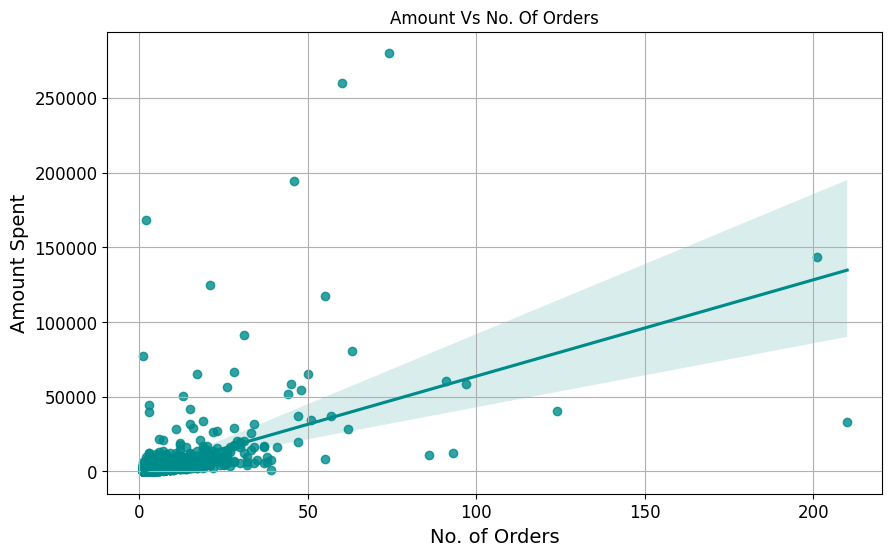

In [64]:
plt.figure(figsize=(10,6))
sns.regplot(y='Amount', x='No.of.Orders', data=Customer_df_new, color='darkcyan')

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='No. of Orders', size=14)
plt.ylabel(ylabel='Amount Spent', size=14)
plt.title('Amount Vs No. Of Orders')
plt.grid()
plt.show()

In [65]:
Customer_df_new.corr()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc
CustomerID,1.000000,0.009350,-0.011608,-0.014058,-0.008427,0.419380
Days since last Purchase,0.009350,1.000000,-0.260627,-0.122040,-0.000986,-0.008300
No.of.Orders,-0.011608,-0.260627,1.000000,0.553228,-0.022823,-0.022915
Amount,-0.014058,-0.122040,0.553228,1.000000,-0.037224,-0.062294
Day.of.the.Week,-0.008427,-0.000986,-0.022823,-0.037224,1.000000,0.041754
Country_enc,0.419380,-0.008300,-0.022915,-0.062294,0.041754,1.000000


<Axes: >

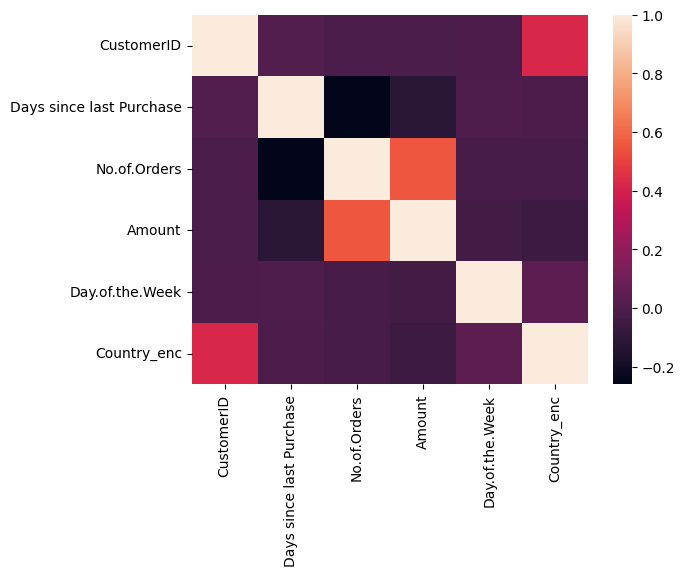

In [66]:
sns.heatmap(Customer_df_new.corr())

In [67]:
Customer_df_new.describe()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc
count,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000
mean,15294.640212,91.962963,4.275592,2050.029081,2.544513,33.157350
std,1724.722441,99.940570,7.700710,8976.350009,1.843768,6.254393
min,12346.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,13806.500000,17.000000,1.000000,306.635000,1.000000,35.000000
50%,15292.000000,50.000000,2.000000,671.960000,2.000000,35.000000
75%,16776.500000,141.000000,5.000000,1661.860000,4.000000,35.000000
max,18287.000000,373.000000,210.000000,280206.020000,6.000000,36.000000


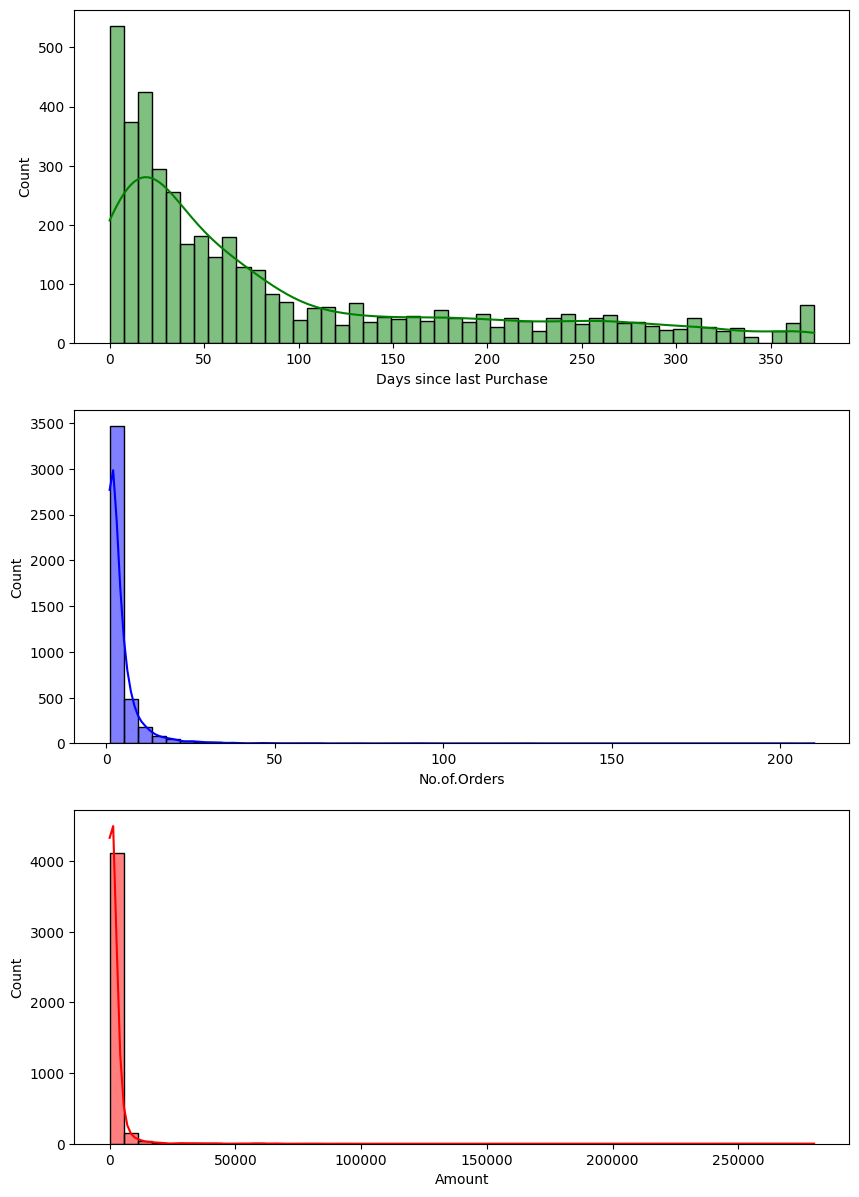

In [68]:
fig, ax = plt.subplots(3,1,  figsize=(10, 6))
plt.subplots_adjust(top = 2)

sns.histplot(Customer_df_new['Days since last Purchase'], kde=True, color='g', bins=50, ax=ax[0]);
sns.histplot(Customer_df_new['No.of.Orders'], color='b', kde=True, bins=50, ax=ax[1]);
sns.histplot(Customer_df_new['Amount'], color='r', kde=True, bins=50, ax=ax[2]);

plt.show()

- We observe **skewness** in the columns 'Days since last Purchase,' 'No. of Orders,' and 'Amount.' 

# 10. Feature Scaling

- **Scaling** the data ensures equal weighting and regularization.

In [69]:
Customer_df_new['ATV'] = Customer_df_new['Amount']/Customer_df_new['No.of.Orders']
Customer_df_new.head()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc,ATV
0,12346.0,325,1,77183.60,1,35,77183.600000
1,12347.0,2,7,4310.00,1,16,615.714286
2,12348.0,75,4,1797.24,3,12,449.310000
3,12349.0,18,1,1757.55,0,18,1757.550000
4,12350.0,310,1,334.40,2,24,334.400000


In [70]:
df_to_be_scaled = Customer_df_new.drop(columns=['CustomerID', 'Day.of.the.Week', 'Country_enc'], axis=1)
df_to_be_scaled.head()

,Days since last Purchase,No.of.Orders,Amount,ATV
0,325,1,77183.60,77183.600000
1,2,7,4310.00,615.714286
2,75,4,1797.24,449.310000
3,18,1,1757.55,1757.550000
4,310,1,334.40,334.400000


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_to_be_scaled)

scaled_data = scaler.transform(df_to_be_scaled)
scaled_df = pd.DataFrame(data=scaled_data, columns=df_to_be_scaled.columns)
scaled_df.head()

,Days since last Purchase,No.of.Orders,Amount,ATV
0,2.332024,-0.425411,8.371132,42.779123
1,-0.900268,0.353827,0.251798,0.110319
2,-0.169750,-0.035792,-0.028165,0.017587
3,-0.740155,-0.425411,-0.032587,0.746627
4,2.181918,-0.425411,-0.191150,-0.046449


In [72]:
scaled_df['CustomerID'] = Customer_df_new['CustomerID']
scaled_df.head()

,Days since last Purchase,No.of.Orders,Amount,ATV,CustomerID
0,2.332024,-0.425411,8.371132,42.779123,12346.0
1,-0.900268,0.353827,0.251798,0.110319,12347.0
2,-0.169750,-0.035792,-0.028165,0.017587,12348.0
3,-0.740155,-0.425411,-0.032587,0.746627,12349.0
4,2.181918,-0.425411,-0.191150,-0.046449,12350.0


In [73]:
scaled_df['Day.of.the.Week'] = Customer_df_new['Day.of.the.Week']
scaled_df['Country_enc'] = Customer_df_new['Country_enc']
scaled_df.head()

,Days since last Purchase,No.of.Orders,Amount,ATV,CustomerID,Day.of.the.Week,Country_enc
0,2.332024,-0.425411,8.371132,42.779123,12346.0,1,35
1,-0.900268,0.353827,0.251798,0.110319,12347.0,1,16
2,-0.169750,-0.035792,-0.028165,0.017587,12348.0,3,12
3,-0.740155,-0.425411,-0.032587,0.746627,12349.0,0,18
4,2.181918,-0.425411,-0.191150,-0.046449,12350.0,2,24


# 11. Dimensionality Reduction

In [74]:
from sklearn.decomposition import PCA
scaled_df.set_index('CustomerID', inplace=True)

pca = PCA().fit(scaled_df)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(explained_variance_ratio)
print(cumulative_explained_variance)

[0.84117858 0.07303152 0.03775735 0.02366499 0.01742033 0.00694722]
[0.84117858 0.9142101  0.95196745 0.97563245 0.99305278 1.        ]


In [75]:
max_variance_features = sorted(range(len(explained_variance_ratio)), key=lambda i: explained_variance_ratio[i], reverse=True)
max_variance_features

[0, 1, 2, 3, 4, 5]

In [76]:
feature_names = scaled_df.columns

print("Top features contributing to maximum variance:")
for i in range(len(max_variance_features)):
    feature_index = max_variance_features[i]
    feature_name = feature_names[feature_index]
    print(f"\n'{feature_name}': Explained Variance Ratio - \n{(explained_variance_ratio[feature_index])*100}")

Top features contributing to maximum variance:

'Days since last Purchase': Explained Variance Ratio - 
84.11785795062953

'No.of.Orders': Explained Variance Ratio - 
7.3031521651424045

'Amount': Explained Variance Ratio - 
3.7757353198697303

'ATV': Explained Variance Ratio - 
2.366499090944711

'Day.of.the.Week': Explained Variance Ratio - 
1.742033037082784

'Country_enc': Explained Variance Ratio - 
0.6947224363308477


In [77]:
pca = PCA(n_components=4)

Customer_df_new_pca = pca.fit_transform(scaled_df)

Customer_df_new_pca = pd.DataFrame(Customer_df_new_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

Customer_df_new_pca.index = scaled_df.index
Customer_df_new_pca.head()

,PC1,PC2,PC3,PC4
CustomerID,,,,
12346.0,-1.490482,-2.841826,19.446102,33.303306
12347.0,17.178748,-1.325193,0.445010,-0.638333
12348.0,21.147061,0.753814,-0.170849,-0.191555
12349.0,15.190418,-2.335738,-0.056887,0.100743
12350.0,9.162084,-0.386649,-1.188378,1.316729


In [78]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #F1F7B4' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=scaled_df.columns)

pc_df.style.apply(top3, axis=0)

,PC1,PC2,PC3,PC4
Days since last Purchase,0.001302,0.004192,-0.310382,0.598173
No.of.Orders,0.003918,-0.025701,0.590773,-0.326653
Amount,0.010353,-0.036254,0.655261,0.200483
ATV,0.005679,-0.023158,0.350463,0.703635
Day.of.the.Week,-0.013505,0.998635,0.048564,0.012754
Country_enc,-0.999831,-0.014091,0.010031,0.005400


- Extracted coefficients corresponding to each principle component.

# 12. Model Development

####  **Elbow Analysis** - To find the optimum K value.

In [79]:
inertia_vals = []
k_vals = [x for x in range(1,16)]

from sklearn.cluster import KMeans
for k in k_vals:
    print('k_value is:', k)
    km = KMeans(n_clusters=k, max_iter=500, random_state=4)
    km.fit(scaled_df)
    inertia_vals.append(km.inertia_)

k_value is: 1
k_value is: 2
k_value is: 3
k_value is: 4
k_value is: 5
k_value is: 6
k_value is: 7
k_value is: 8
k_value is: 9
k_value is: 10
k_value is: 11
k_value is: 12
k_value is: 13
k_value is: 14
k_value is: 15


#####  Visualizing K_value vs Inertia

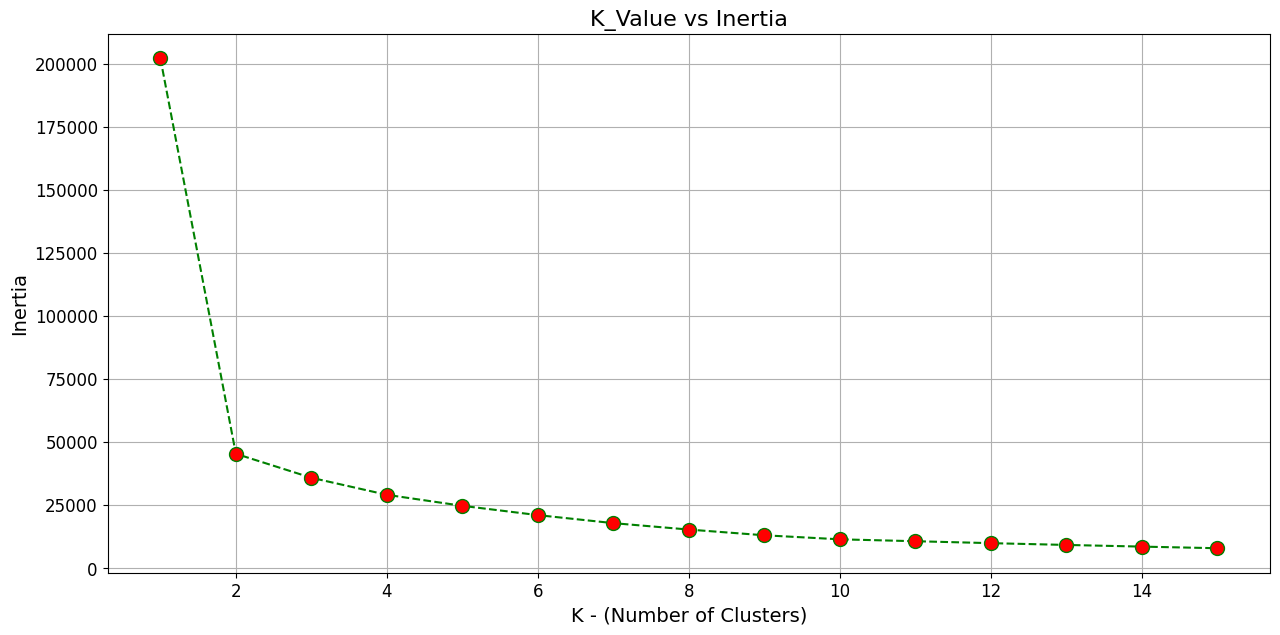

In [80]:
fig = plt.figure(figsize=(15, 7))
plt.plot([x for x in range(1,16)], inertia_vals, marker='o', 
         linestyle='dashed', markersize=10, markerfacecolor='red', c='green')

plt.xlabel(xlabel='K - (Number of Clusters)', fontsize=14)
plt.ylabel(ylabel='Inertia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='K_Value vs Inertia', fontsize=16)

plt.grid()
plt.show()

- Utilizing the interactive plot with **Plotly**.

In [81]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=k_vals, y=inertia_vals, fill='toself', mode='lines+markers'))

fig.update_layout(xaxis= dict(tickmode='linear', tick0=1, dtick=1), 
                  title_text = 'K_values vs Inertia', 
                  title_x=0.5, xaxis_title='K - (No. of Clusters)',
                  yaxis_title='Inertia')
fig.show()

##### From the above Elbow plot, we can consider the no. of clusters as 3.

####  **Final Model** 

In [82]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=500, random_state=4)
kmeans.fit(Customer_df_new_pca)

from collections import Counter
cluster_frequencies = Counter(kmeans.labels_)

label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

Customer_df_new['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
Customer_df_new_pca['cluster'] = new_labels


In [83]:
Customer_df_new.head()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc,ATV,cluster
0,12346.0,325,1,77183.60,1,35,77183.600000,0
1,12347.0,2,7,4310.00,1,16,615.714286,2
2,12348.0,75,4,1797.24,3,12,449.310000,2
3,12349.0,18,1,1757.55,0,18,1757.550000,2
4,12350.0,310,1,334.40,2,24,334.400000,0


In [84]:
centers = kmeans.cluster_centers_
centers

array([[-1.71841463e+00,  1.54979508e+00,  2.76882223e-02,
         6.50861990e-03],
       [ 2.13489470e+01,  2.48498899e-02,  2.43662274e-02,
        -1.16993243e-02],
       [-1.66364312e+00, -1.52170453e+00, -3.09363408e-02,
        -4.54034154e-03]])

In [85]:
Customer_df_new_pca['cluster'].value_counts()

cluster
0    2035
1    1993
2     319
Name: count, dtype: int64

In [86]:
Customer_df_new_pca.head()

,PC1,PC2,PC3,PC4,cluster
CustomerID,,,,,
12346.0,-1.490482,-2.841826,19.446102,33.303306,0
12347.0,17.178748,-1.325193,0.445010,-0.638333,2
12348.0,21.147061,0.753814,-0.170849,-0.191555,2
12349.0,15.190418,-2.335738,-0.056887,0.100743,2
12350.0,9.162084,-0.386649,-1.188378,1.316729,0


#### Visualizing the Clusters

In [87]:
colors = ['#FF0D00', '#0D00FF', '#00FF3A']

In [88]:
cluster_0 = Customer_df_new_pca[Customer_df_new_pca['cluster'] == 0]
cluster_1 = Customer_df_new_pca[Customer_df_new_pca['cluster'] == 1]
cluster_2 = Customer_df_new_pca[Customer_df_new_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#E9FFA5", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#E9FFA5", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#E9FFA5", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

In [89]:
labels = Customer_df_new_pca['cluster'].value_counts().index[0:10]
values = Customer_df_new_pca['cluster'].value_counts().values[0:10]

# Initiate an empty figure
fig = go.Figure()

# Add a trace of bar to the figure
fig.add_trace(trace=go.Bar(x=values, 
                           y=labels, 
                           orientation='h',
                           marker=dict(color='rgba(69, 214, 179, 1.0)',
                                       line=dict(color='rgba(66, 5, 84, 1.0)', 
                                                 width=3))))

# Update the layout with some cosmetics
fig.update_layout(height=500, 
                  width=1000, 
                  title_text='Distribution of Customers', 
                  title_x=0.5, 
                  xaxis_title='No. of Customers', 
                  yaxis_title='Clusters')

# Display the figure
fig.show()

# 13. Clustering Evaluation

- **Silhouette score**: The silhouette score is a metric used to evaluate the quality of clusters in clustering algorithms. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a higher score indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters.
- **Calinski-Harabasz score**: The Calinski-Harabasz score, also known as the Variance Ratio Criterion, is another metric used to evaluate the quality of clusters in clustering algorithms. It measures the ratio of between-cluster dispersion to within-cluster dispersion. A higher Calinski-Harabasz score indicates better-defined clusters.
- **Davies Bouldin score**: The Davies-Bouldin score is yet another metric used for evaluating clustering algorithms. It quantifies the "compactness" and "separation" of clusters, where lower values indicate better clustering.

In [90]:
no_of_obs = len(Customer_df_new_pca)

# Separate the features and the cluster labels
X = Customer_df_new_pca.drop('cluster', axis=1)
clusters = Customer_df_new_pca['cluster']

# Compute the metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from tabulate import tabulate


Sil_score = silhouette_score(X, clusters)
Calinski_score = calinski_harabasz_score(X, clusters)
Davies_score = davies_bouldin_score(X, clusters)

table_data = [
    ["Number of Customers", no_of_obs],
    ["Silhouette Score", Sil_score],
    ["Calinski Harabasz Score", Calinski_score],
    ["Davies Bouldin Score", Davies_score]
]

print(tabulate(table_data, headers=["Evaluation Metric", "Score"], tablefmt='pretty'))

+-------------------------+--------------------+
|    Evaluation Metric    |       Score        |
+-------------------------+--------------------+
|   Number of Customers   |        4347        |
|    Silhouette Score     | 0.4360397784308235 |
| Calinski Harabasz Score | 11725.322278958844 |
|  Davies Bouldin Score   | 0.7410799395070392 |
+-------------------------+--------------------+


- The Silhouette score is **0.4360** which is considered average, but still suggests that the clustering result has relatively well-separated clusters.
- The Calinski-Harabasz score of **11725** implies that the clustering result has very well-defined clusters with minimal overlap and high compactness. It indicates a strong clustering solution, with clear separation between the clusters.
- The Davies Bouldin score of **0.7410** indicates that the clusters are reasonably well-separated, although there may be some degree of overlap or ambiguity between clusters. It suggests that the clustering result is generally good, but there may still be room for improvement.

### Radar Chart Analysis

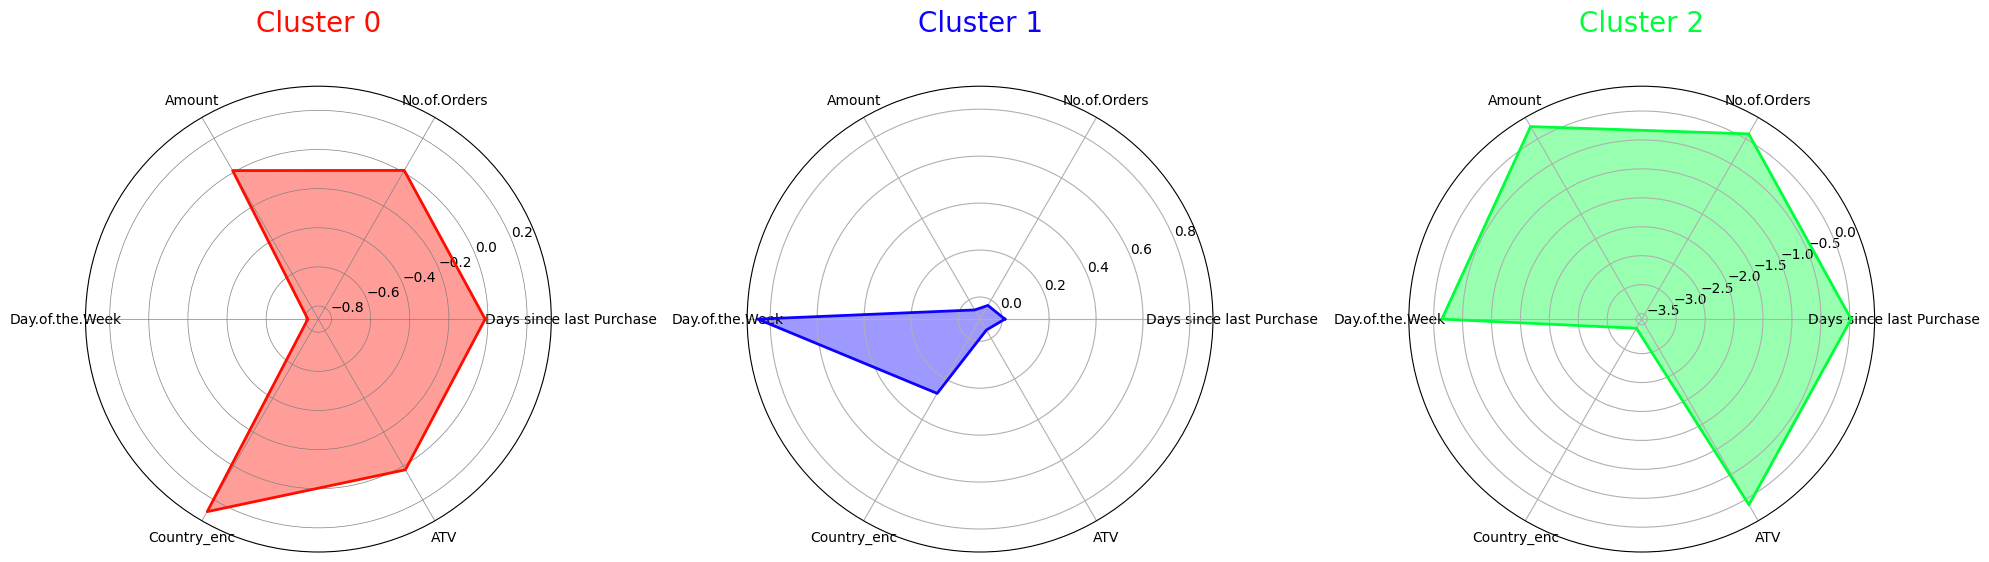

In [91]:
df_customer = Customer_df_new.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


# 14. Customer Categorization based on Clustering Analysis

In [92]:
Customer_df_new['Country'] = Customer_df['Country']
Customer_df_new.head()

,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc,ATV,cluster,Country
0,12346.0,325,1,77183.60,1,35,77183.600000,0,United Kingdom
1,12347.0,2,7,4310.00,1,16,615.714286,2,Iceland
2,12348.0,75,4,1797.24,3,12,449.310000,2,Finland
3,12349.0,18,1,1757.55,0,18,1757.550000,2,Italy
4,12350.0,310,1,334.40,2,24,334.400000,0,Norway


#### The Cust_set1 represents customers belonging to the 'Red' segment of the Radar chart analysis:

 - These customers exhibit a moderate level of spending, but their transactions are not very frequent.
 - They prefer to shop on Wednesdays and Tuesdays.
 - Their average transaction value is relatively high, indicating substantial purchases when they shop.
 - The majority of them are based in the UK.

Here is the list of customers in this cluster:

In [93]:
Cust_set1 = Customer_df_new[Customer_df_new['cluster'] == 0]
print(Cust_set1.shape)
Cust_set1.head()

(2035, 9)


,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc,ATV,cluster,Country
0,12346.0,325,1,77183.60,1,35,77183.600000,0,United Kingdom
4,12350.0,310,1,334.40,2,24,334.400000,0,Norway
5,12352.0,36,8,2506.04,1,24,313.255000,0,Norway
9,12356.0,22,3,2811.43,1,26,937.143333,0,Portugal
16,12363.0,109,2,552.00,0,36,276.000000,0,Unspecified


#### The Cust_set2 represents customers belonging to the 'Blue' segment of the Radar chart analysis:

- These customers tend to spend less, with fewer transactions and products purchased.
- Their average transaction value is the lowest among all customer groups, indicating less shopping activity compared to other segments.
- The majority of them prefer to shop on Thursdays and Fridays, closer to the weekends, as indicated by the high Day_of_Week value.

Here is the list of customers in this cluster:

In [94]:
Cust_set2 = Customer_df_new[Customer_df_new['cluster'] == 1]
print(Cust_set2.shape)
Cust_set2.head()

(1993, 9)


,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc,ATV,cluster,Country
7,12354.0,232,1,1079.40,3,30,1079.400,1,Spain
10,12357.0,33,1,6207.67,6,32,6207.670,1,Switzerland
31,12381.0,4,5,1845.31,4,24,369.062,1,Norway
52,12409.0,78,3,11072.67,4,32,3690.890,1,Switzerland
53,12410.0,308,2,693.33,4,32,346.665,1,Switzerland


#### The Cust_set3 represents customers belonging to the 'Green' segment of the Radar chart analysis:

- The majority of these customers are residing in Germany, France, and Belgium.
- Their average transaction value is higher than the other two groups of customers, suggesting they may be considered as original high-ticket buyers.
- The majority of them prefer to shop on Thursdays and Mondays.

Here is the list of customers in this cluster:

In [95]:
Cust_set3 = Customer_df_new[Customer_df_new['cluster'] == 2]
print(Cust_set3.shape)
Cust_set3.head()

(319, 9)


,CustomerID,Days since last Purchase,No.of.Orders,Amount,Day.of.the.Week,Country_enc,ATV,cluster,Country
1,12347.0,2,7,4310.00,1,16,615.714286,2,Iceland
2,12348.0,75,4,1797.24,3,12,449.310000,2,Finland
3,12349.0,18,1,1757.55,0,18,1757.550000,2,Italy
6,12353.0,204,1,89.00,3,2,89.000000,2,Bahrain
8,12355.0,214,1,459.40,0,2,459.400000,2,Bahrain


 ### Pie chart illustrating the distribution of customers across clusters.

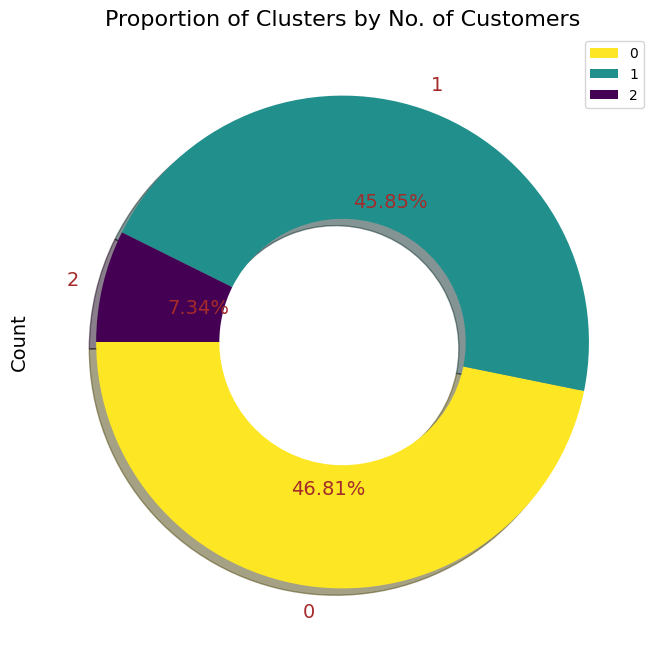

In [96]:
plt.figure(figsize=(15,8))
Customer_df_new['cluster'].value_counts().plot(kind='pie', fontsize=14, autopct='%1.2f%%', 
                                               textprops={'color':"brown"}, wedgeprops=dict(width=0.5), 
                                               shadow=True, startangle=180, cmap='viridis_r', legend=True)
plt.ylabel(ylabel='Count', size=14)
plt.title(label='Proportion of Clusters by No. of Customers', size=16)
plt.show()

#### Here's a concise conclusion for each of the three customer sets:

**Cust_set1 (Yellow Segment):**

- These customers display moderate spending behavior, with fewer but substantial transactions.
- They prefer shopping on Wednesdays and Tuesdays.
- Majority of them are located in the UK.


**Cust_set2 (Cyan Segment):**

- Customers in this segment tend to spend less, with fewer transactions and products purchased.
- They show a preference for shopping on Thursdays and Fridays.
- Their average transaction value is the lowest among all segments.


**Cust_set3 (Purple Segment):**

- The majority of these customers are located in Germany, France, and Belgium.
- They exhibit higher spending behavior compared to other segments, possibly representing high-ticket buyers.
- Prefer shopping on Thursdays and Mondays.


These conclusions provide valuable insights into the distinct characteristics and preferences of each customer segment, aiding in **targeted marketing strategies** and **personalized customer experiences**.

# 15. Conclusion



- Our data analysis journey encompassed a comprehensive approach, beginning with exploratory data analysis (**EDA**) to gain an understanding of the dataset's characteristics, trends, and patterns. 
- Through statistical modeling techniques, we delved deeper into the relationships between variables, identifying **key factors** that influence customer behavior and purchasing patterns.

--------------------------------------------------------------------------

- Uncovering hidden patterns within the data was made possible through the application of **unsupervised machine learning**, particularly the **KMeans clustering** algorithm. 
- By segmenting customers based on their purchasing behavior, we gained insights into distinct **customer groups** and their preferences.

--------------------------------------------------------------------------

- To further enhance our analysis, we employed dimensionality reduction techniques, notably **Principal Component Analysis (PCA)**, to effectively manage high-dimensional data and identify the **most important features** driving customer behavior.

--------------------------------------------------------------------------

- The visualization of our findings played a pivotal role in conveying complex insights in a clear and intuitive manner.
- Leveraging powerful visualization libraries such as Seaborn, Matplotlib, and Plotly, we created compelling visualizations that provided valuable insights into **customer segments, purchasing trends**, and **geographical distributions**.

--------------------------------------------------------------------------

- Through our comprehensive analysis, we unearthed actionable insights with the potential to significantly impact the **profitability** of the online store. 
- By understanding customer preferences, **optimizing marketing strategies**, and **tailoring product offerings**, we can drive **revenue growth** and enhance **customer satisfaction**.

--------------------------------------------------------------------------

Our journey exemplifies the transformative power of data science in driving informed decision-making and unlocking opportunities for business success. By harnessing the wealth of information contained within data, we empower organizations to make strategic decisions that drive growth and competitive advantage in today's data-driven world."